In [2]:
import pandas as pd

# Load the datasets
true_df = pd.read_csv("C:/Users/USER/Downloads/archive (1)/True.csv")  # Path to your True.csv
fake_df = pd.read_csv("C:/Users/USER/Downloads/archive (1)/Fake.csv")  # Path to your Fake.csv

# Add labels (1 = Real, 0 = Fake)
true_df["label"] = 1
fake_df["label"] = 0

# Merge the datasets
data = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

# Shuffle the dataset to mix fake and real news
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the merged dataset
data.to_csv("merged_news.csv", index=False)

print("Dataset merged successfully!")


Dataset merged successfully!


In [4]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
data = pd.read_csv("merged_news.csv")  # Replace with your dataset path
data.dropna(inplace=True)


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['text'] = data['text'].apply(clean_text)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [18]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Naïve Bayes Performance:
Accuracy: 0.9328507795100223
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4669
           1       0.92      0.94      0.93      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



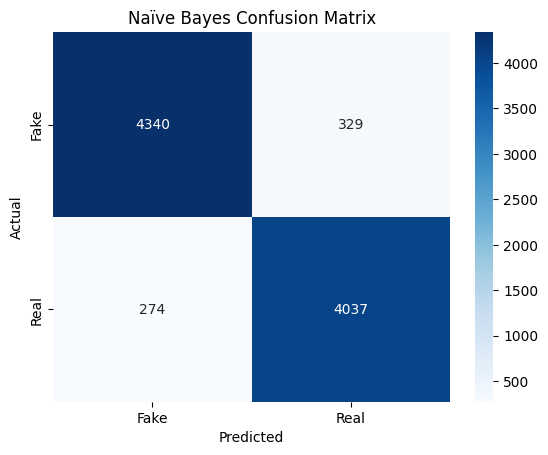

Logistic Regression Performance:
Accuracy: 0.9851893095768374
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4669
           1       0.98      0.99      0.98      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



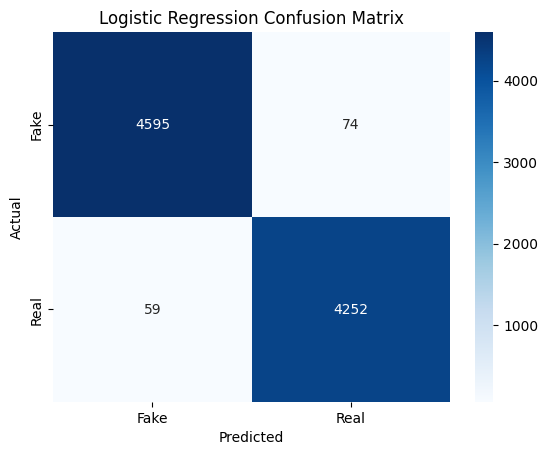

In [ ]:
models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

for name, model in models.items():
    train_and_evaluate(model, X_train_tfidf, X_test_tfidf, y_train, y_test, name)
